# **Welcome to this COVID19 modeling activity!**
*    You will learn how to plot data as well as some techniques for analysing real 
data so you can use it to make predictions!


*    Before Getting started run all the code cells below this one until you reach the next markdown cell (A markdown cell is one like this one that has normal looking text in it, not code). This will pull needed files from github, move you into the directory you need to be in, and import libraries you will need to use.

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/Colab Notebooks/Covid_Activity

/content/drive/My Drive/Colab Notebooks/Covid_Activity


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as s

In [0]:
# reading in the csv file
all_data = np.loadtxt("ActivityData_april4.csv", comments='#', delimiter=",", dtype=str)

#separating the columns
time = all_data[:,0].astype('float64')
italy = all_data[:,1].astype('float64')
italy_rate = all_data[:,2].astype('float64')
france = all_data[:,3].astype('float64')
france_rate = all_data[:,4].astype('float64')
england = all_data[:,5].astype('float64')
england_rate = all_data[:,6].astype('float64')
hubei = all_data[:,7].astype('float64')
hubei_rate = all_data[:,8].astype('float64')
southkorea = all_data[:,9].astype('float64')
southkorea_rate = all_data[:,10].astype('float64')
usa = all_data[:,11].astype('float64')
usa_rate = all_data[:,12].astype('float64')
bc = all_data[:,13].astype('float64')
bc_rate = all_data[:,14].astype('float64')

**This is a markdown cell!!**

## Now that we have all the data we need in a nice useable form, we can actually start using it!

*    The first thing that we are going to do is make a plot of the number of cases in each country as a function of time. We can make plots using the function plt.plot()  .

*  The plt in the beginning tells python to look in the pyplot library named we named plt .  The function is called plot. All functions have parenthesies after them. They take the things written in the parentheses (these are called arguments) and do something with them. For example the plot function will take data for x-values and data for y-values in the pqrentheses, and give back a plot.  When a function takes several arguments, like both x-data and y-data, then you need to put commas between the arguments inside the parentheses

*    There are also a few extras you can use to make the plot a little nicer, for example functions that create a legend, a title, axis labels etc, and arguments that choose the color of a line on the plot, label the line...  I will mention a few that might be useful. For a little bit longer (but still short and clear) tutorial on plotting options you can check out this link: https://matplotlib.org/tutorials/introductory/pyplot.html 

In [0]:
# Write a code in this cell to create your plot!






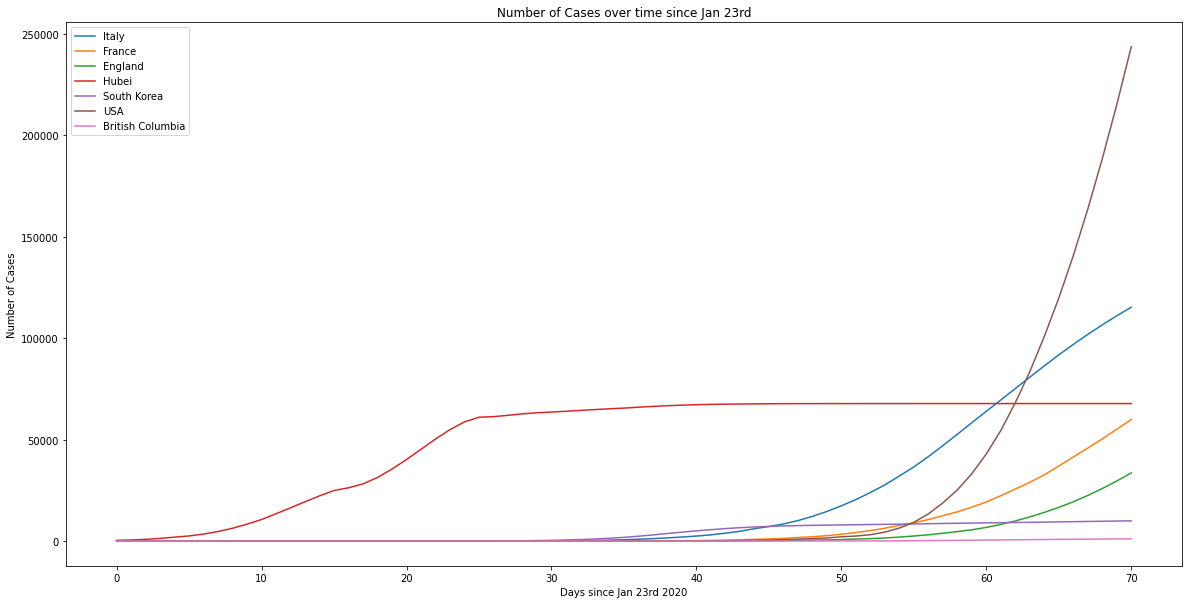

In [0]:
# Solution code: Remove from file for students

# plot as a function of time
plt.figure(figsize=(20,10))
plt.plot(time, italy, label = 'Italy')
plt.plot(time, france, label = 'France')
plt.plot(time, england, label = 'England')
plt.plot(time, hubei, label = 'Hubei')
plt.plot(time, southkorea, label = 'South Korea')
plt.plot(time, usa, label = 'USA')
plt.plot(time, bc, label = 'British Columbia',)
plt.title('Number of Cases over time since Jan 23rd')
plt.xlabel('Days since Jan 23rd 2020')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


## **What does this graph tell us?**

*    Some of the lines go much higher than others, but all of them climb a little, or a lot, and level off (though some haven't levelled off yet). Levelling off is when the curve stops going up and becomes constant. This is what people mean when they talk about flattening the curve.

*    We know all the curves must level off one day because the number of cases cannot become infinite. We definitely know there can't be more cases than there are people on earth! And that's a very big number but it's not infinite.  So if everyone on the planet got COVID then after that, the number of cases would stop going up and stay constant. 

*   But I certainly hope most people on the planet **won't** get COVID!!!! So how can we predict when the curve will start levelling off?  We will be able to do this based on the shape of the curve in the parts where it is going up.


## **What do we need for the curve to start flattening?**

*    We need the growth to get slower. In other words the slope to get less steap. That means the growth rate needs to go down. 


*    We can calculate the growth rate from the number of cases per day data:



![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQkOoAOx9VVYtYrKv_b9FHY18QZ6jR5X893cikQWOcYiSInSBPL&usqp=CAU)

Using this formula, the growth rate per day (per day -> x2-x1 = 1 since our time units are days) is just y2-y1 which is the number of *new* cases each day.

*    I have actually already done this for you though since we haven't really learned about array opperations and indexing.  You will see we have arrays for the rates of each country. 

*    Your job now is to plot the growth rate as a function of time (not eyou can just copy past from your last plot and change all the country name variables to the corresponing ones _rate. For example:
plt.plot(time, italy, label = 'Italy')   ->    plt.plot(time, italy_rate, label = 'Italy')

In [0]:
#   Your plot here






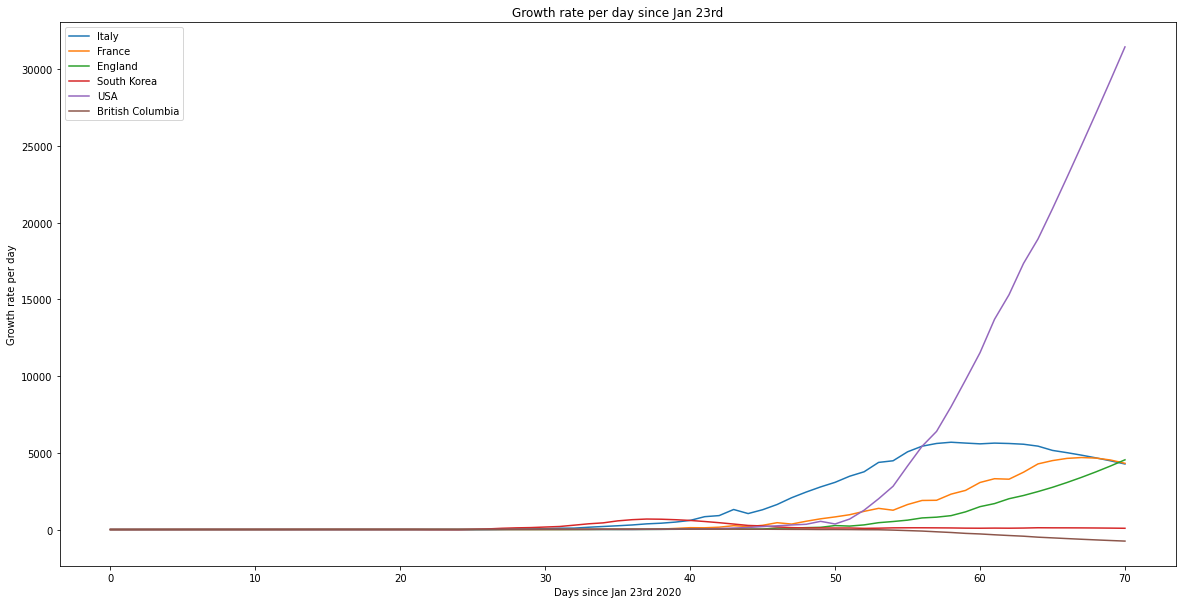

In [0]:
# **Solution code: Remove from file for students!!!!!!!!!!!!!**

# plot as a function of time
plt.figure(figsize=(20,10))
plt.plot(time, italy_rate, label = 'Italy')
plt.plot(time, france_rate, label = 'France')
plt.plot(time, england_rate, label = 'England')
#plt.plot(time, hubei_rate, label = 'Hubei')
plt.plot(time, southkorea_rate, label = 'South Korea')
plt.plot(time, usa_rate, label = 'USA')
plt.plot(time, bc_rate, label = 'British Columbia',)
plt.title('Growth rate per day since Jan 23rd')
plt.xlabel('Days since Jan 23rd 2020')
plt.ylabel('Growth rate per day')
plt.legend()
plt.show()

##  **Did you notice that in the section where they are going up all these curves have a similar shape?**

*    This shape is called an exponential (the function obtained by raising a constand to the power of whatever your variable is; for example: 2^x, or 10^x, or e^x).

*    Any kind of population that doesn't have something slowing it's growth grows with this shape. You can think of it like this: you start with 2=2^1animals at time=1, by time=2 they have had 2 babies so now you have 4=2^2 animals, at time=3 those babies have each had 2 babies so now you have 4+2+2=8=2^3 animals, at time t=4 each of the 2+2=4 babies from last time have had babies 2 babies each, so now you have 8+2+2+2+2 = 16 = 2^4 animals.  Thus at some time t, you have 2^t animals: exponential growth over time!
![alt text](https://images.slideplayer.com/26/8479671/slides/slide_13.jpg)

*    The COVID virus spreads exponentially because of it4s incubation time (the time you are contageous before you know you are sick). This means that before you know you are sick you might have given it to 2 other people, and before they know they are sick each of them might have given it to another 2 people... I think you see where I am going with this!

*    Of course the model can be generalized a little. What if the average couple doesn't have 2 kids but some other number? This can be taken into account by multiplying by some factor in the exponential. for exa;ple if the variable you are taking the exponential of is x and the factor you need for your population is 0.9, then you would take the exponential of 0.9*x.  This doesn4t change the overal shape of the exponential cuvre.

## In order to see the exponential shape and check we can get the shapes from our previous plots by using a factor in the exponential we are going to plot an exponential of x and an exponential of a factor times x.


*    Some hints for plotting: 
      *     You can choose the factor to be whatever you want and your plot will still an exponential, but I recommend something very close to 1 (like 0.9) if you want to see it nicely on the same graph as your exponential of x.
      *     There is a function np.arange() which takes a number as an argument and will give you back an array with elements that are nummbers counting sequentially up from 0 to the number you put in.
      *    There is a function np.exp() which takes in an array for an argument and gives you back an array with the exponential function (e^x) applied to each element

In [0]:
# Plot your exponential here








[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


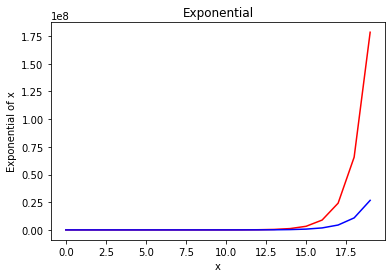

In [0]:
# **Solution code: Remove from file for students!!!!!!!!!!!!!**

# plotting an exponential
x = np.arange(20)
print(x)

plt.plot(x, np.exp(x), 'r')
plt.plot(x, np.exp(0.9*x), 'b')
plt.title('Exponential')
plt.xlabel('x')
plt.ylabel('Exponential of x')
plt.show()

##  Doesn't this look a terribly lot like the shape of the shape of our  initial number of cases as a function of time graph?  How can both the number of cases and the slope of the number of cases/ growth rate have the same shape?

*    This is something very special about exponentials! In fact, a function and it's growth rate being proportional is sometimes even taken as the definition of the exponential function! (Another way of writing this, for those of you that know some calculus is that if y(t) is an exponential, then 
dy/dt = constant*y  
(you can see this from the fact that the derivative of e^x = e^x.)

*    Since the growth rate and the number of cases are both exponential, we can only shift by constants, either multiplying by a constant factor or adding a constant term. This means we have an equation of the form 

growth rate = constant_1 * number of cases + constant_2

*    This is a function for growth rate though!!! This means we can plot it and see when it starts to go down! Then we will know that the curve is starting to flatten!

*    One more thing though: Do you recognize this equation? What shape do you expect it to be?


*    If you said a line you might want to try plotting it. This was a tricky question!  It is stating that the growth rate is linear as a function of the number of cases. But the plot of growth rate as  a function of number of cases will not be linear.  Again, if this is confusing try plotting it!!!!

*    This is not a line because the number of cases themselves aren't linear but exponential. In other words what we really have is something like

growth rate = const_1*e^x + const_2

*  If you tried plotting growth rate as a function of number of cases you would have seen that it is a little difficult to see exactly when it starts going down.  But if we can make this linear it will be really easy to see when a country4s curve deveates from the line and starts dropping down.  We can do this with just a little algebra:
![alt text](https://slideplayer.com/slide/6260500/21/images/6/Linearizing+Exponential+Functions%3A.jpg) 

## **In conclusion, if we plot ln(growth rate) as a function of ln(number of cases) we will get a linear plot which will take a turn down whn the curve begins to flatten. So let's make that plot!!**

*    Hint: you can use the function np.log() which gives the natural logarythm, that is ln, of it's argument
     

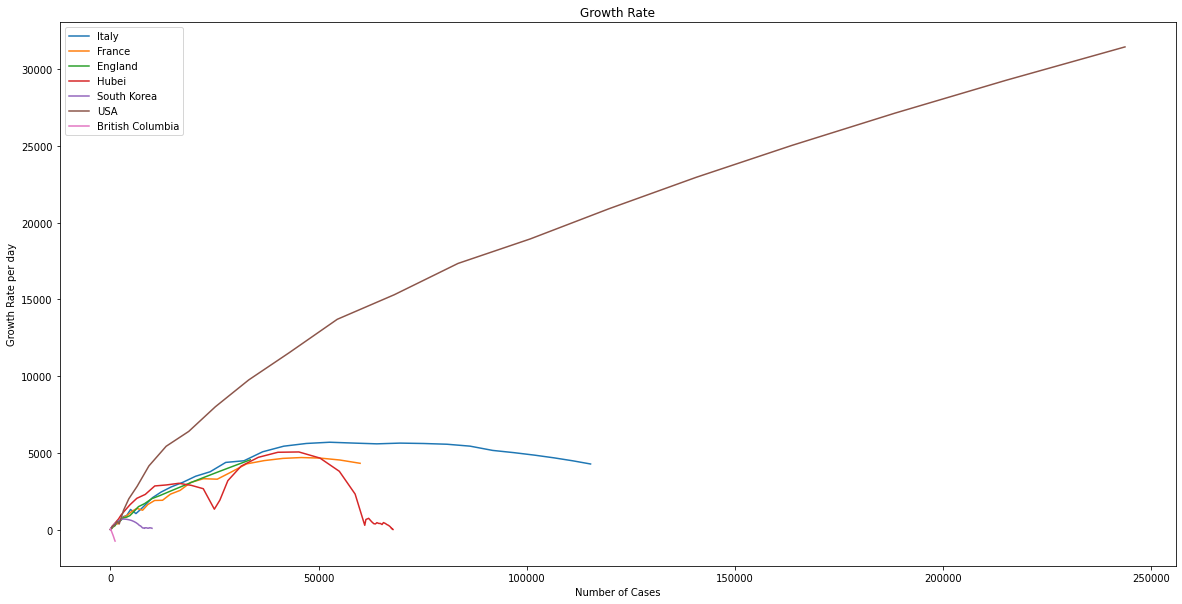

In [74]:
#  Solution for growth rate as a function of number of cases

#plotting the growth rate
plt.figure(figsize=(20,10))
plt.plot(italy, italy_rate, label = 'Italy')
plt.plot(france, france_rate, label = 'France')
plt.plot(england, england_rate, label = 'England')
plt.plot(hubei, hubei_rate, label = 'Hubei')
plt.plot(southkorea, southkorea_rate, label = 'South Korea')
plt.plot(usa, usa_rate, label = 'USA')
plt.plot(bc, bc_rate, label = 'British Columbia',)
plt.title('Growth Rate')
plt.xlabel('Number of Cases')
plt.ylabel('Growth Rate per day')
plt.legend()
plt.show()

In [0]:
#  Your plot of ln(growth rate) as a function of ln(number of cases)











/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


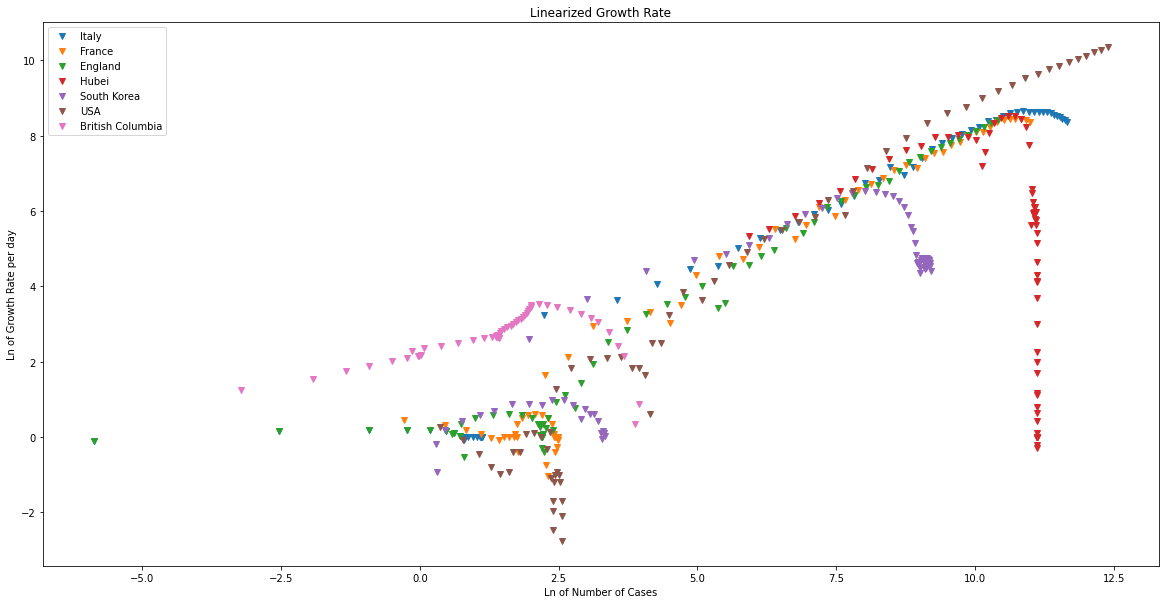

In [75]:
# solution for plotting the log of the groth rate



# plotting linearized growth rate
plt.figure(figsize=(20,10))
plt.plot(np.log(italy), np.log(italy_rate), 'v', label = 'Italy')
plt.plot(np.log(france), np.log(france_rate), 'v', label = 'France')
plt.plot(np.log(england), np.log(england_rate), 'v', label = 'England')
plt.plot(np.log(hubei), np.log(hubei_rate), 'v', label = 'Hubei')
plt.plot(np.log(southkorea), np.log(southkorea_rate), 'v', label = 'South Korea')
plt.plot(np.log(usa), np.log(usa_rate), 'v', label = 'USA')
plt.plot(np.log(bc), np.log(bc_rate), 'v', label = 'British Columbia',)
plt.title('Linearized Growth Rate')
plt.xlabel('Ln of Number of Cases')
plt.ylabel('Ln of Growth Rate per day')
plt.legend()
plt.show()

##  Granted this graph could be a lot smoother if we did some more math on it (including a least quare fit for the linear part) but it is already astounding to see how well it agrees with what we are hearing for predictions on the news!!!!!

*  Hubei was the first hit, it grew very fast because it didn4t know what the virus was or what to do at first, it did take very strong measures however even tracking all the contacts of people who had the virus, and you see it's growth rate plummet!

*    South Korea was also a country that was hit hard but took extreme measures and we see it dive down too!

*    With a little imagination it looks like Italy might be about to head down too, corresponding with the phrase going around that all of it's drastic social distancing policies are finally helping it turn the corner

*    The USA that didn4t want to take measures early on is still growing faster and faster!

*    And finally, BC, which isn4t very hard it, but which took some measures early, but not as drastic ones as some other countries looks like it is taking a dip too!  This could be the affect of the policies inacted a few weeks ago. Even so, the crisis isn't over, the growth rate is still positive, so we are still getting more cases not less, but it looks like the rate at which we are getting more cases is dropping: the curve is getting a little flatter!

##  Let's end on that optimistic note.  Stay safe and keep up the good social distancing work guys!